In [1]:
# Importo las bibliotecas que voy a utilizar

import numpy as np
import matplotlib.pyplot as plt
import ht, pint
from IPython.display import Image

## Trabajo Práctico Nº1 - Conducción 

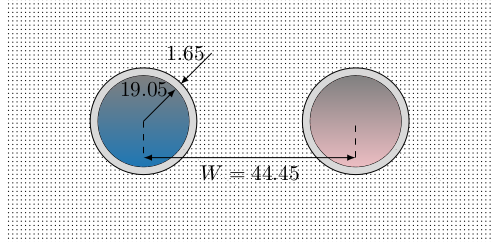

In [2]:
Image("caños.png",width = 600, height = 300)

La Figura  ilustra dos caños que se encuentran enterrados bajo una casa y que transfieren agua y calor desde y hacia una caldera. El tubo de la derecha transporta agua caliente a una temperatura $T_{a,c} = 60^\circ$ mientras que el de la izquierda lleva agua de la casa a la caldera a $T_{a,f} = 20^\circ$. Ambos tubos tienen un diámetro exterior $D_0 = 0.75"$ y espesor 
$1.65mm$ y son de acero galvanizado. El coeficiente de transferencia por convección entre el agua y la pared interna de los caños puede estimarse $h_w = 250 W/m^2K$. La distancia entre centros de los caños es de $44.45mm$ y el largo de los mismos es $L = 6m$. La conductividad del suelo pueden considerarla $k_s=0.30 W/mK$.

- Estimar la transferencia de calor desde el agua caliente hacia el agua fría debida a la proximidad entre los tubos.
- Para realizar el punto anterior, debe haberse determinado un factor de forma. Intente encontrar una solución aproximada y compárela. (Puede pensar en un método gráfico o uno que pueda justificar como una aproximación de orden de magnitud razonable).
- Realizar un gráfico de la transferencia de calor como una función de la distancia entre centros de los tubos.

### Resolución:

Primero pienso que mecanismos de transferencia de calor estan involucrados en este problema. 

Empezando por el agua caliente, sabemos que va haber un proceso de convección entre el fluido y la pared interior del caño, luego una transferencia de calor por conducción en el acero galvanizado y luego tambien por conducción pero por la tierra. Despues tenemos nuevamente conducción en el caño de agua fria, y convección entre la pared interior y el fluido.

Para resolver el problema puedo buscar las resistencias termicas de cada uno de estos procesos, para finalmente calcular una resistencia equivalente y asi obtener la trasnsferencia de calor pedida.

#### Simplificaciones:

Para poder resolver, pienso un modelo del problema donde asumo que:

- En los caños, su longitud es mucho mayor a sus diámetros, por lo que lo pensamos como un problema plano.
- Los caños estan suficientemente separados como para que la temperatura en toda la superficie de cada uno de estos sea constante. 
- Asumo un problema estancionario.

Teniendo en cuenta esto, puedo pensar el problema en una sola dimensión por simetria.

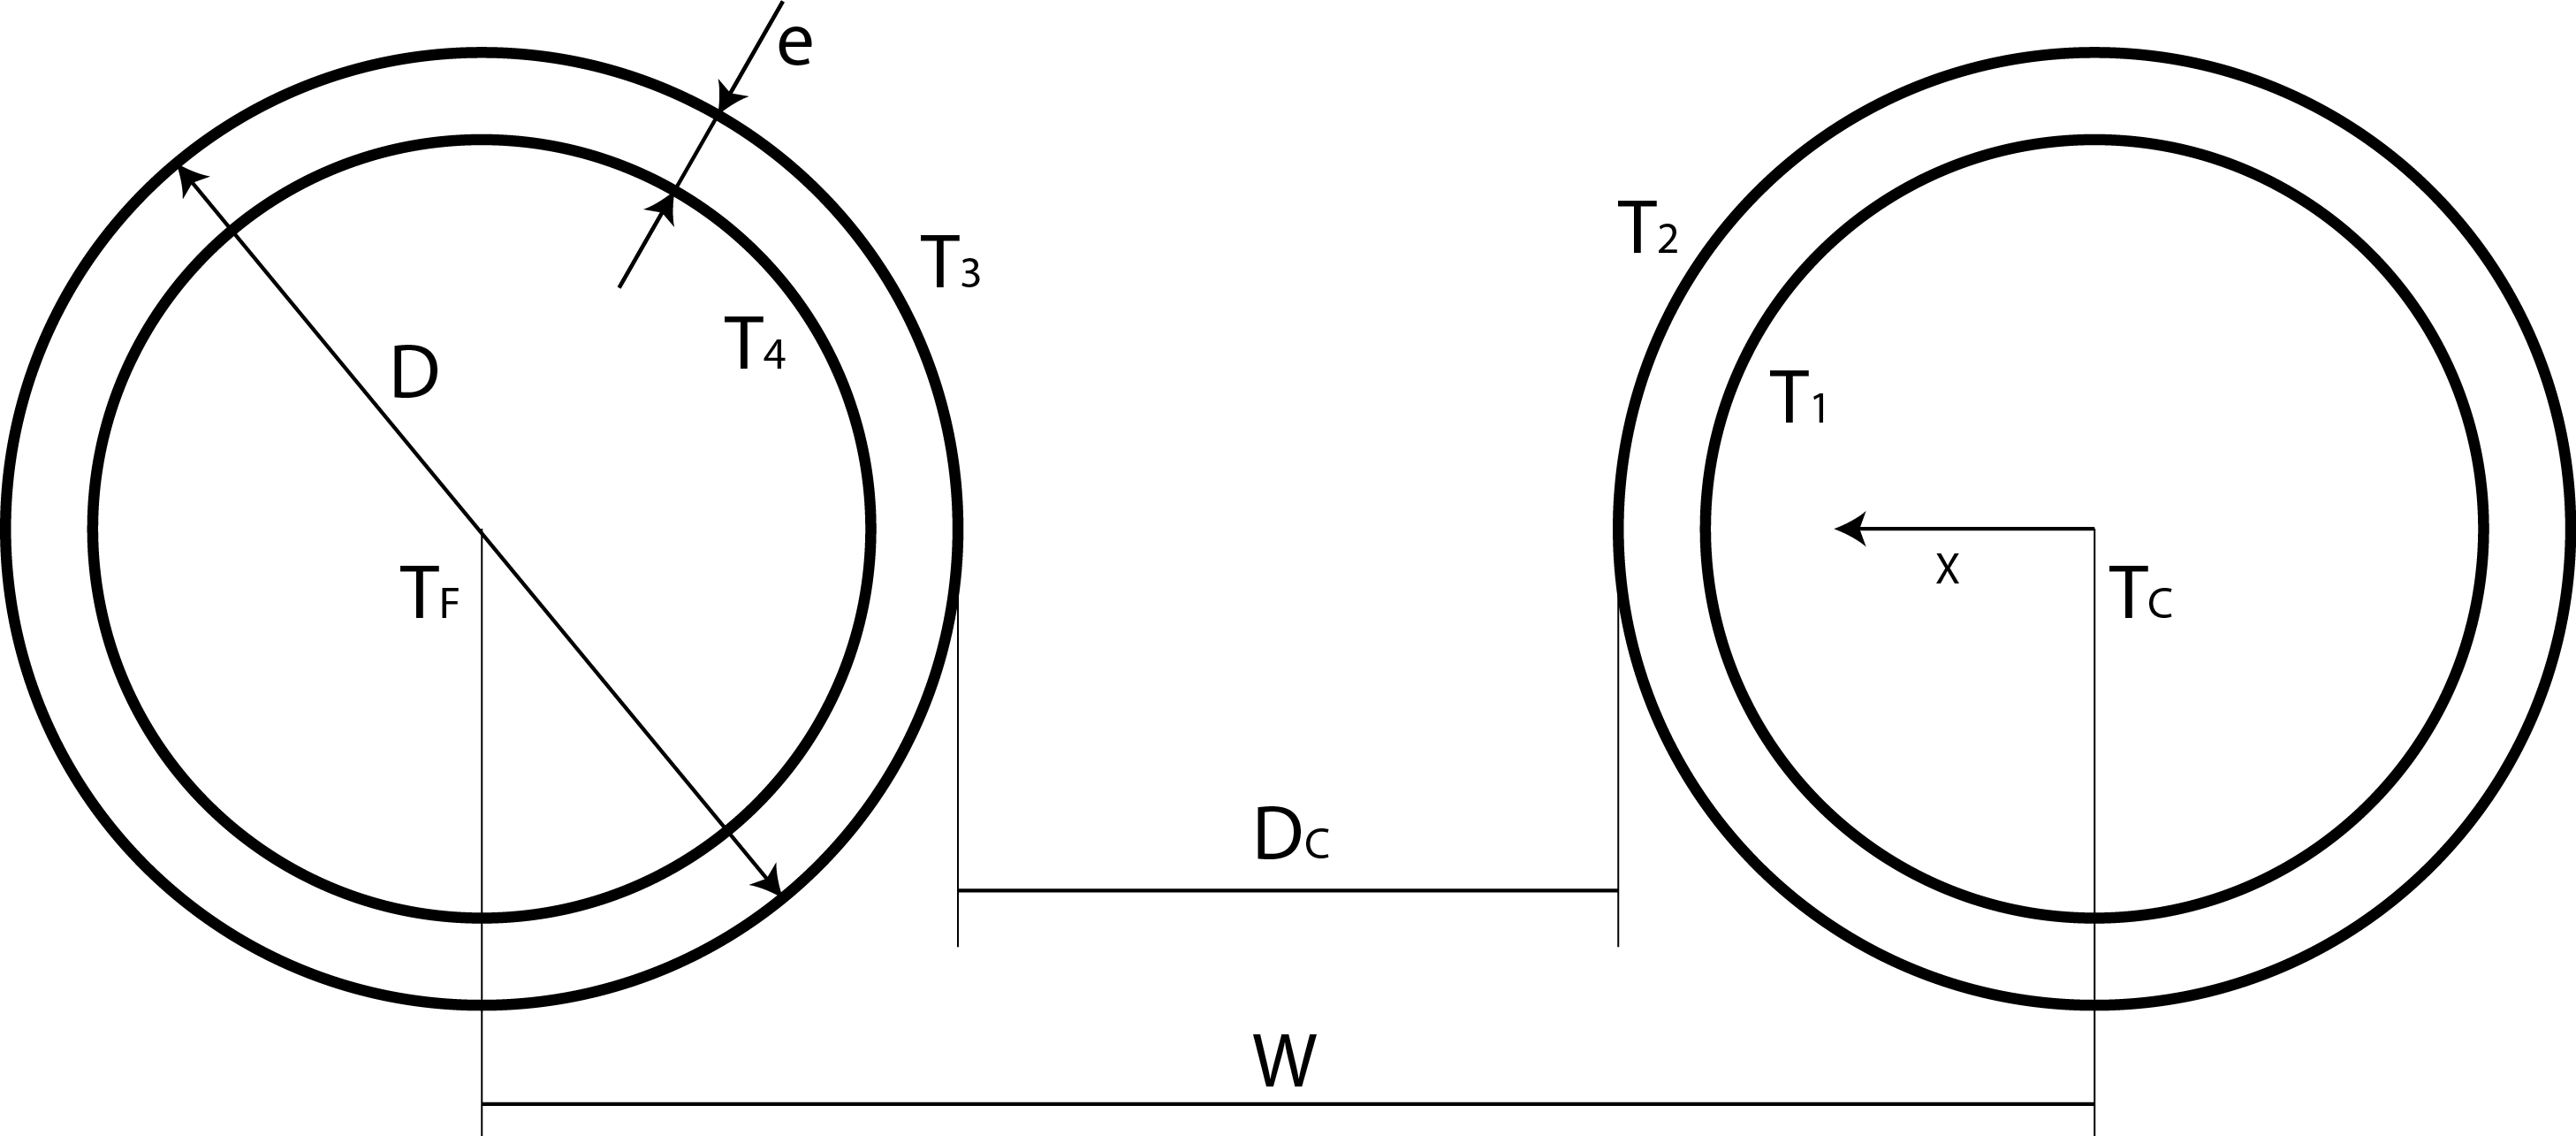

In [3]:
Image("caños2.png",width = 600, height = 300)

#### Convección:

Sabiendo que para la convección:

$$\dot{Q}_{conv} = \alpha S (T_w - T_{\infty})$$

Donde:

- $\alpha:$ Coeficiente de transferencia por convección.
- $S:$ Superficie del solido expuesta al fluido.
- $T_w:$ Temperatura de la pared del sólido.
- $T_{\infty}:$ Temperatura del fluido lejos del sólido.

Si llamo $\dot{Q}^1_{conv}$ a la que se da en en la pared interior del caño caliente, y $\dot{Q}^5_{conv}$ y la que se da en el frio:

$$\dot{Q}^1_{conv} = \alpha S (T_C - T_1)$$

$$\dot{Q}^5_{conv} = \alpha S (T_4 - T_F)$$

#### Conducción en los caños:

Tengo que resolver la ecuacion de Laplace

Asumiendo un cilindro infinito, por simetria y uniformidad, en coordenadas cilindricas:

$$\frac{\delta(*)}{\delta\theta} = \frac{\delta(*)}{\delta z}= 0$$

$$\nabla^2 T= \Delta T = \frac{1}{r}\frac{\delta}{\delta r}\left(r\frac{\delta T}{\delta r}\right) + 
\frac{1}{r^2}\frac{\delta^2 T}{\delta \theta^2}+\frac{\delta^2 T}{\delta z^2} = 0$$


$$\Delta T = \frac{1}{r}\frac{\delta}{\delta r}\left(r\frac{\delta T}{\delta r}\right) = 0$$


Integrando:

$$\left(r\frac{\delta T}{\delta r}\right) = A \implies \frac{\delta T}{\delta r} = \frac{A}{r}$$

$$ \implies T(r)=A\ln(r)+B$$

Para calcular las constantes, utilizo las condiciones de borde. En este caso tengo condiciones tipo Dirichlet, donde esta fijo el valor de temperatura en las dos paredes del caño.

$$T(r) = T_c + \frac{(T_C - T_F)}{\ln(R_1 / R_2)}\ln(r / R_1)$$


Uso ahora la ley de Fourier para calcular el flujo de calor:

$$ \vec{\dot{q}} = -\lambda\nabla T$$

$$ \vec{\dot{q}} = -\lambda\frac{\delta T}{\delta r}\vec{e_r}$$

$$ \vec{\dot{q}} = -\lambda\left(\frac{1}{r}\frac{(T_C - T_F)}{\ln(R_1 / R_2)}\right)\vec{e_r}$$

Integrando obtengo $\dot{Q}_{cond}$:

$$\dot{Q}_{cond} = \lambda\left(\frac{(T_C - T_F)}{\ln(R_1 / R_2)} 2\pi L\right)$$

$$\dot{Q}_{cond} = \left(\frac{ \lambda 2\pi L}{\ln(R_1 / R_2)}\right) (T_C - T_F)$$

Si llamo $\dot{Q}^2_{cond}$ a la que se da en en la pared del caño caliente, y $\dot{Q}^4_{cond}$ y la que se da en el frio:

$$\dot{Q}^2_{cond} = \left(\frac{ \lambda_{ac} 2\pi L}{\ln(R_1 / R_2)}\right) (T_1 - T_2)$$

$$\dot{Q}^4_{cond} = \left(\frac{ \lambda_{ac} 2\pi L}{\ln(R_1 / R_2)}\right) (T_4 - T_3)$$

#### Conducción en la tierra:

Como se trata de un problema en dos dimensiones con geometrias no triviales, voy a utilizar directamente la expresion del tipo:

$$\dot{Q} = \lambda S \Delta T$$

Donde S es un facto de forma para la conducción. De la bibliografia, puedo usar para dos cilindros paralelelos donde $L >> D_1 , D_2$ (que se cumple en mi caso):

$$S = \frac{2\pi L}{\cosh^{-1}\left(\frac{4 W^2 - D_1^2 - D_2^2}{2 D_1 D_2} \right)}$$

Donde:

- $W:$ Distancia entre centros de los cilindros.
- $D_1, D_2:$ Diametros de los cilindros.

Si llamamos $\dot{Q}^3_{cond}$ a la que se da entre los dos caños:

$$\dot{Q}^3_{cond} = \frac{\lambda_{ti} 2\pi L}{\cosh^{-1}\left(\frac{4 W^2 - 2D^2}{2 D^2} \right)} (T_3 - T_2) $$


#### Igualando:

Finalmente, sabiendo que estamos en un estado estacionario, y no se acomula calor en ninguna de las superficies. Sabemos que todos los flujos de calor son iguales, por lo tanto:


$$\dot{Q} = \alpha S (T_C - T_1) = \left(\frac{ \lambda_{ac} 2\pi L}{\ln(R_1 / R_2)}\right) (T_1 - T_2) = \frac{\lambda_{ti}2\pi L}{\cosh^{-1}\left(\frac{4 W^2 - 2D^2}{2 D^2} \right)} (T_3 - T_2) = \left(\frac{ \lambda_{ac} 2\pi L}{\ln(R_1 / R_2)}\right) (T_4 - T_3) = \alpha S (T_4 - T_F)$$

#### Analogía eléctrica:

Podemos definir entonces:

$$R_1 = \frac{1}{\alpha 2 \pi R_1}$$

$$R_2 = \left(\frac{\ln(R_1 / R_2)}{ \lambda_{ac} 2\pi L}\right)$$

$$R_3 =  \frac{\cosh^{-1}\left(\frac{4 W^2 - 2D^2}{2 D^2} \right)}{\lambda_{ti}2\pi L}$$

$$R_4 = \left(\frac{\ln(R_1 / R_2)}{ \lambda_{ac} 2\pi L}\right)$$

$$R_5 = \frac{1}{\alpha 2 \pi R_1}$$


Reemplazando:

$$R_1 \dot{Q} + R_2 \dot{Q} + R_3 \dot{Q} + R_4 \dot{Q} + R_5 \dot{Q} = T_C - T_F$$

$$R_{eq} \dot{Q} = T_C - T_F$$

Donde:

$$R_{eq} = R_1 + R_2 + R_3 + R_4 + R_5 $$



In [4]:
# Cargo los datos de nuestro problema:
e = 1.65 # Espesor del caño [mm]
r_ext = 0.02# Radio externo del caño [m]
l = 6 # Largo de los caños [m]
w =  0.04445 # Distancia enre los centros [m]
t_fria = 293 # Temperatura agua fria [K]
t_caliente = 333 # Temperatura agua caliente [K]
alpha_conv = 250 # Coeficiente de trasnferencia por convección entre el agua y el acero [W/m2K]
lambda_tierra = 0.30 # Conductividad del suelo [W/mK]


# Busco en la biblioteca de ht el acero galvanizado y guardamos su conductividad:
acero_galvanizado =  ht.nearest_material('galvanized steel')
lambda_acero = ht.k_material(acero_galvanizado) # Conductividad del caño [W/mK]

# Calculo los valores que vamos a necesitar:
r_int = r_ext - (e / 1000) # Radio interior [m]
d = 2 * r_ext # Diametro exterior [m]
s = l * np.pi * r_int**2 # Superficie interna [m2]

In [5]:
# Calculo las resistencias:
r_1 = 1/(alpha_conv * s)

r_2 = (np.log(r_ext/r_int)/(lambda_acero * 2 * np.pi * l))

n = 2*((w/d)**2) -1
r_3 = (np.arccosh(n)/lambda_tierra * 2 * np.pi * l)

r_4 = r_2

r_5 = r_1

# Resitencia equivalente:
r_eq = r_1 + r_2 + r_3 + r_4 + r_5


#### Resuelvo:

In [6]:
# Calculo la trasnferencia de calor:

q = (t_caliente - t_fria)/r_eq


print('La trasnferencia de calor resulta  Q = ',"{:.4f}".format(q),'W')

La trasnferencia de calor resulta  Q =  0.3369 W


### Grafica de la transferencia en función de la distancia que hay entre los caños:

In [7]:
# Creo una función auxiliaria para calcular la resistencia de la conducción el el suelo:

def r_3(w):
    n = 2*((w/d)**2) -1
    return((np.arccosh(n)/lambda_tierra * 2 * np.pi * l))


r_1245 = r_1 + r_2 + r_4 + r_5 # Resistencia equivalente sin lla conducción en el suelo:


# Calculo la transferencia para la distancia que ingreso:

def q(w):
    return((t_caliente - t_fria)/(r_1245+r_3(w)))

In [15]:
# Creo un vector de todos los puntos donde voy a calcular:

minimo = 0.041
maximo = 0.1
valores = 1000

x = np.linspace(minimo,maximo,valores)
y = q(x)

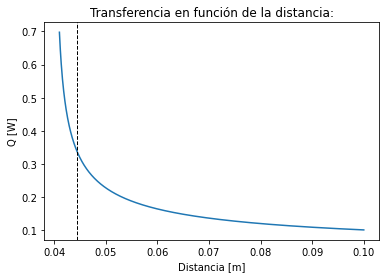

In [16]:
# Grafico los restados: 

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='Distancia [m]', ylabel='Q [W]',
       title='Transferencia en función de la distancia:')

plt.axvline(w,color='k', linestyle='dashed', linewidth=1) # Marco la distancia pedida original del problema

plt.show()

Como era de esperar, el valor baja muy rapidamente al alejar los caños uno de otro.